<a href="https://colab.research.google.com/github/Ram465/ML/blob/main/Lab5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A1.Develop the above perceptronin your own code (don’t use the perceptron model available from package). Use the initial weights as provided below. W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05Use Stepactivation function to learn the weights of the network to implement above provided AND gate logic. The activation function is demonstratedbelow.Identify the number of epochs needed for the weights to converge in the learning process. Make a plot of the epochs against the error values calculated (after each epoch, calculate the sum-square-error against all training samples). (Note: Learning is said to be converged if the error is less than or equal to 0.002. Stop the learning after 1000 iterations if the convergence error condition is not met)

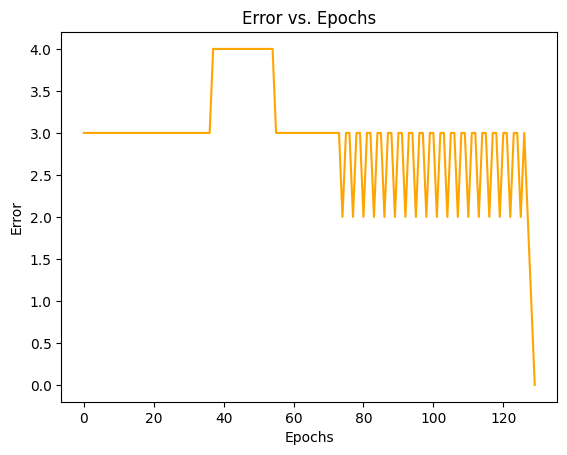

Number of epochs needed for convergence: 130
Final weights: w0 = -0.10000000000000765, w1 = 0.1000000000000001, w2 = 0.05000000000000032


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def perceptron_for_and_gate(initialW, learningR=0.05, convergenceErr=0.002, maxEpoch=1000):
    # Initialize the weights and bias
    w0, w1, w2 = initialW

    # Step activation function
    def stepActivation(x):
        return 1 if x >= 0 else 0

    # Calculating output of perceptron
    def perceptronOutput(x1, x2):
        return w0 + w1 * x1 + w2 * x2

    # Training data
    trainingData = [
        (0, 0, 0),
        (0, 1, 0),
        (1, 0, 0),
        (1, 1, 1) ]

    # Training loop
    epochs = 0
    errors = []

    while True:
        epoch_error = 0
        for x1, x2, target in trainingData:
            output = perceptronOutput(x1, x2)
            error = target - stepActivation(output)
            epoch_error = epoch_error + error ** 2
            w0 = w0 + learningR * error
            w1 = w1 + learningR * error * x1
            w2 = w2 + learningR * error * x2

        errors.append(epoch_error)
        epochs += 1

        if epoch_error <= convergenceErr or epochs >= maxEpoch:
            break

    return epochs, [w0, w1, w2], errors

# Providing Initial weights
initial_weights = [10, 0.2, -0.75]

# Train the perceptron
num_epochs, final_weights, error_history = perceptron_for_and_gate(initial_weights)

# Plotting epochs against error values
plt.plot(range(num_epochs), error_history, color='orange')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.show()
print(f"Number of epochs needed for convergence: {num_epochs}")
print(f"Final weights: w0 = {final_weights[0]}, w1 = {final_weights[1]}, w2 = {final_weights[2]}")
